In [3]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
import sklearn as sk
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv", index_col=0).drop_duplicates()
df.drop_duplicates(df.columns[[0,1,3,4,5,6,7,8,9,10,11,12]],ignore_index = True,inplace = True)
df.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [ ]:
# УБРАТЬ!
#df = pd.read_csv("ikea.csv", index_col=0).drop_duplicates()
#df.drop_duplicates(df.columns[[0,1,3,4,5,6,7,8,9,10,11,12]],ignore_index = True,inplace = True)
#df.head()

In [4]:
df['old_price'] = df['old_price'].str.replace(",","").str.replace("SR ","").str.replace("No old price","0")\
                .str.replace("/4 pack","").str.replace("/2 pack","").astype(int)

In [5]:
df.describe(include='all')

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
count,2.962000e+03,2962,2962,2962.000000,2962.000000,2962,2962,2962,2962,2962,1844.000000,2236.000000,2520.000000
unique,NaN,607,17,NaN,NaN,2,2962,2,1706,381,NaN,NaN,NaN
top,NaN,BESTÅ,Bookcases & shelving units,NaN,NaN,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,Chair,IKEA of Sweden,NaN,NaN,NaN
freq,NaN,115,548,NaN,NaN,2943,1,1637,53,683,NaN,NaN,NaN
mean,4.877244e+07,NaN,NaN,1108.722552,316.689061,NaN,NaN,NaN,NaN,NaN,55.920824,105.325581,109.268254
std,2.896535e+07,NaN,NaN,1393.576103,1026.582733,NaN,NaN,NaN,NaN,NaN,31.015201,63.166967,73.464503
min,5.848700e+04,NaN,NaN,3.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000
25%,2.039630e+07,NaN,NaN,200.000000,0.000000,NaN,NaN,NaN,NaN,NaN,38.000000,70.000000,60.000000
50%,4.928075e+07,NaN,NaN,570.000000,0.000000,NaN,NaN,NaN,NaN,NaN,47.000000,84.000000,80.000000
75%,7.042306e+07,NaN,NaN,1475.000000,0.000000,NaN,NaN,NaN,NaN,NaN,62.000000,136.000000,150.000000


In [6]:
df['sellable_online'].value_counts()

True     2943
False      19
Name: sellable_online, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2962 entries, 0 to 2961
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            2962 non-null   int64  
 1   name               2962 non-null   object 
 2   category           2962 non-null   object 
 3   price              2962 non-null   float64
 4   old_price          2962 non-null   int32  
 5   sellable_online    2962 non-null   bool   
 6   link               2962 non-null   object 
 7   other_colors       2962 non-null   object 
 8   short_description  2962 non-null   object 
 9   designer           2962 non-null   object 
 10  depth              1844 non-null   float64
 11  height             2236 non-null   float64
 12  width              2520 non-null   float64
dtypes: bool(1), float64(4), int32(1), int64(1), object(6)
memory usage: 269.1+ KB


Mean:               1108.72
Median:             570.0
Standart Deviation: 1393.58


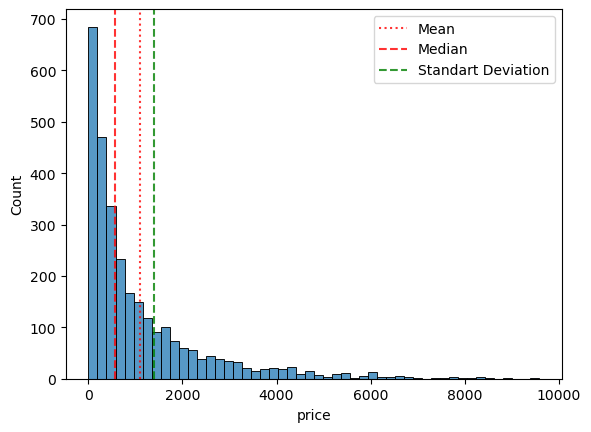

In [8]:
sns.histplot(df.price,bins=50)
print('Mean:              ', round(df.price.mean(),ndigits=2))  
print('Median:            ', df.price.median())
print('Standart Deviation:', round(df.price.std(),ndigits=2))
plt.axvline(df.price.mean(), color='red', alpha=0.8, linestyle='dotted')
plt.axvline(df.price.median(), color='red', alpha=0.8, linestyle='dashed')
plt.axvline(df.price.std(), color='green', alpha=0.8, linestyle='dashed')
plt.legend(['Mean', 'Median','Standart Deviation'])
plt.show()

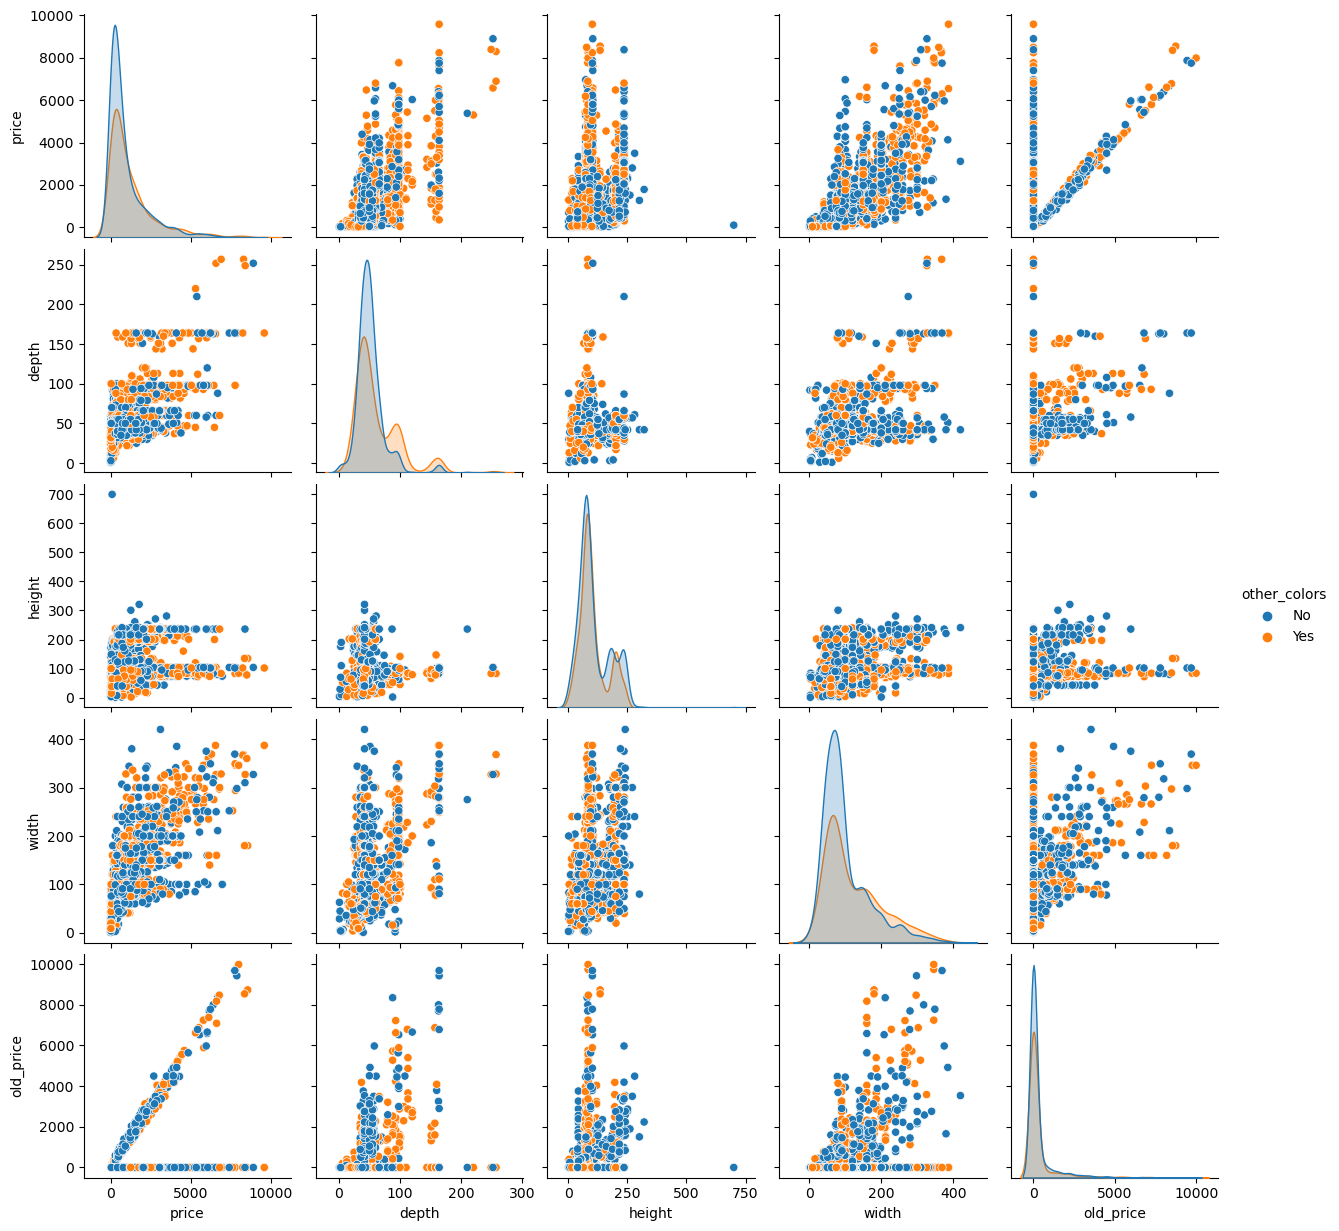

In [9]:
sns.pairplot(df[['price','depth','height','width','other_colors','old_price']],
            hue='other_colors')
plt.show()

- There is a positive covariation between the price and the old price (where there is information about it).
- One-color goods and multi-color products are different in distribution.
- The segmentation of the data is noticeable, let's check the distribution of the data by category:

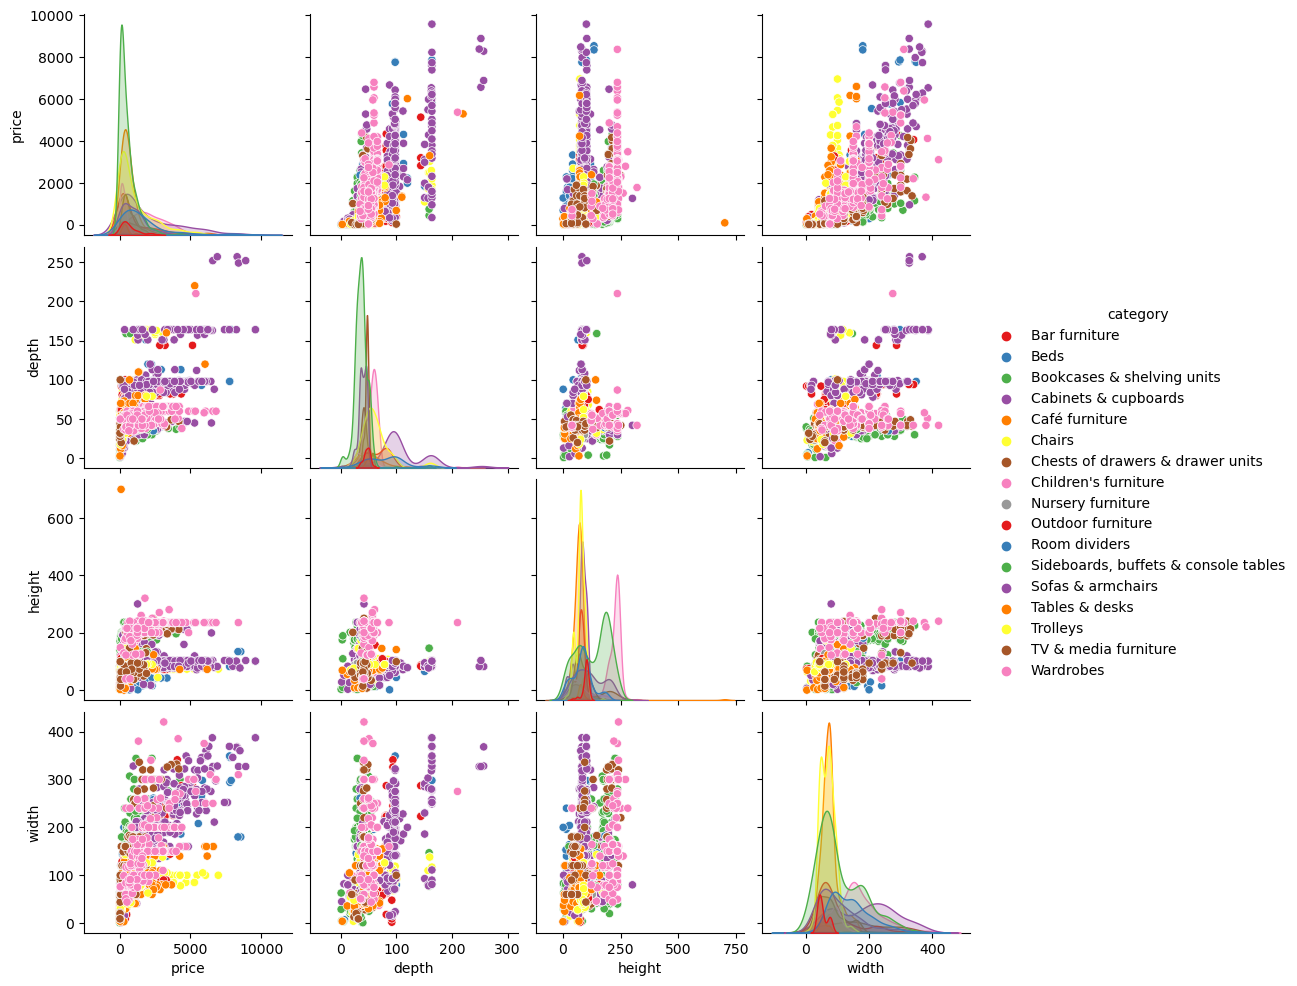

In [10]:
sns.pairplot(df[['price','depth','height','width','category']],
            hue='category', palette = sns.color_palette('Set1'))
plt.show()

As expected, the distribution of the data depends on the product category.
Also, we can assume that there is a pozitive covariation between price and width

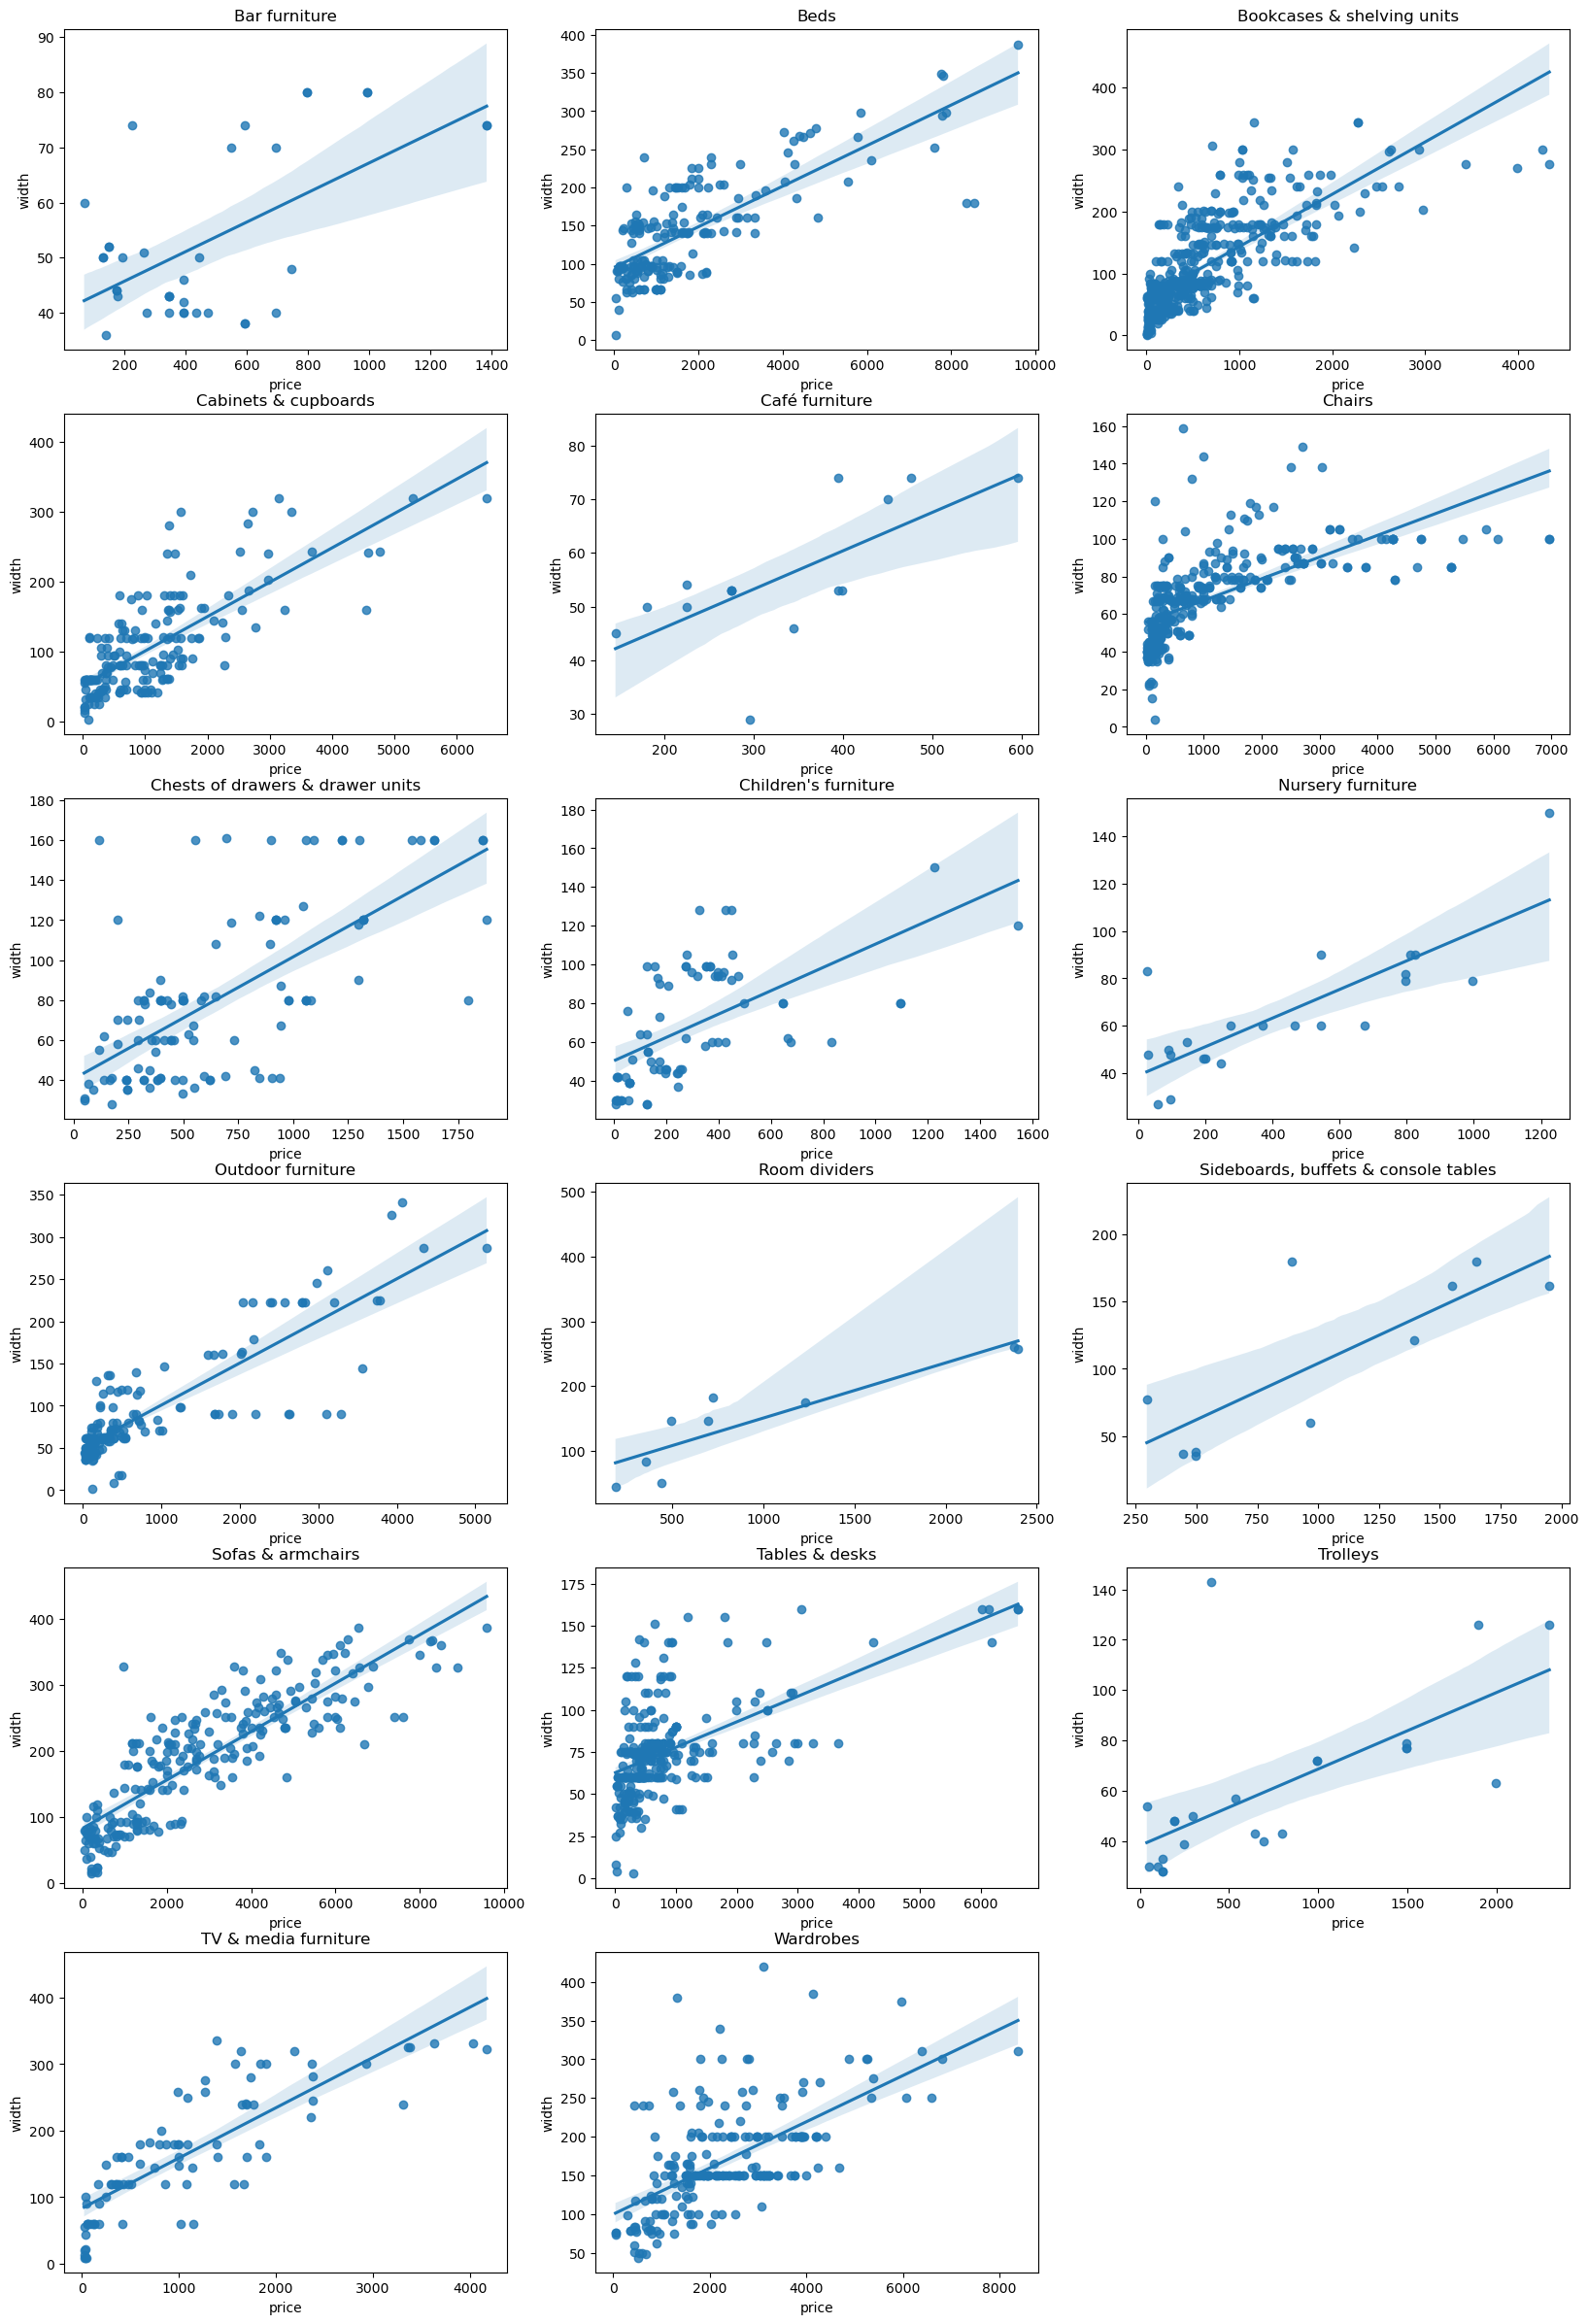

In [11]:
plt.figure(figsize=(20,30))
for i, category in enumerate(df.category.unique()):
    plt.subplot(math.ceil(len(df.category.unique())/3), 3, i+1)
    x = df[df.category == category]
    sns.regplot(x='price',y='width',data=x)
    plt.title(category)
    
plt.show()

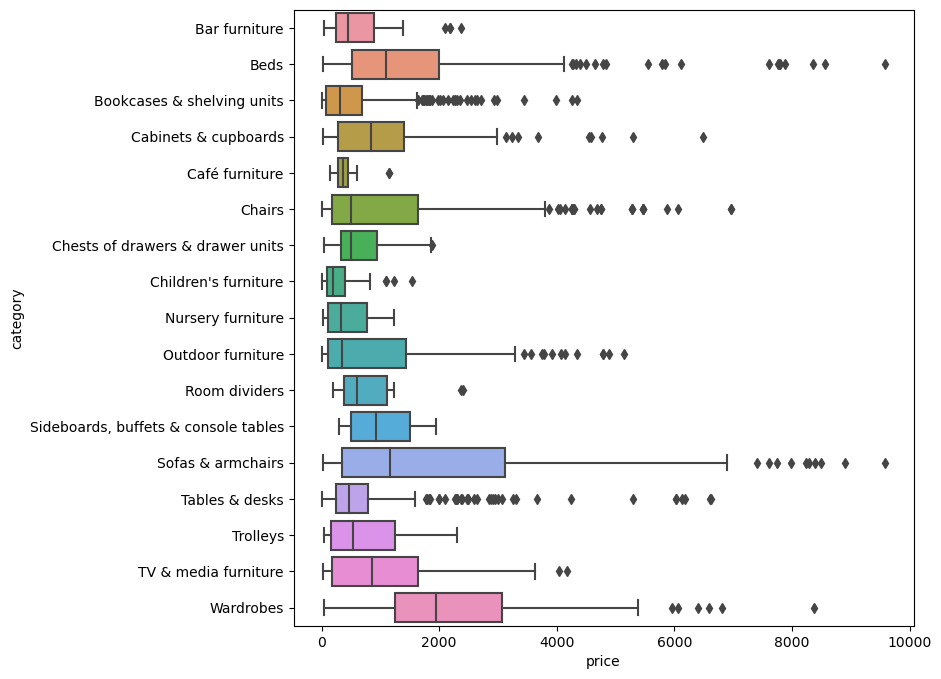

In [12]:
plt.subplots(figsize=(8,8))
sns.boxplot(data=df, x='price', y='category')
plt.show()

As a result of the analysis of prices by category, we can see:
- as it was noticed before, the prices in different product categories differ significantly
- there are outliers in the data on prices in the categories, from which the model should be cleaned in the future

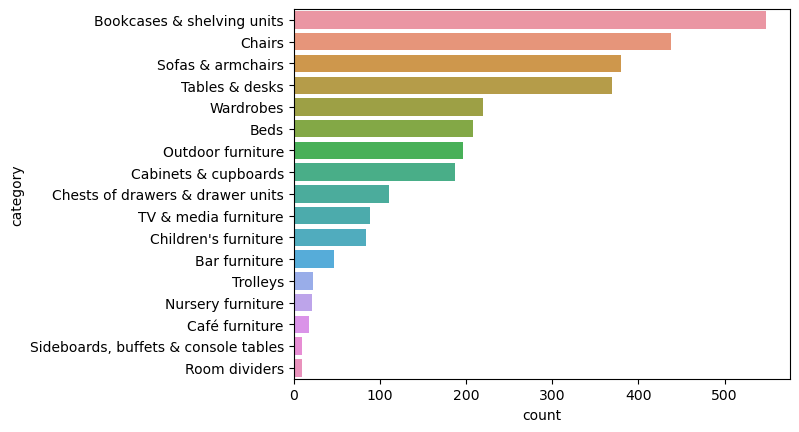

In [13]:
sns.countplot(y=df['category'],order = df['category'].value_counts().index)
plt.show()

The most weighty categories in the data are: Bookcases & shelving units, Chairs, Sofas & armchairs, Tables & desks

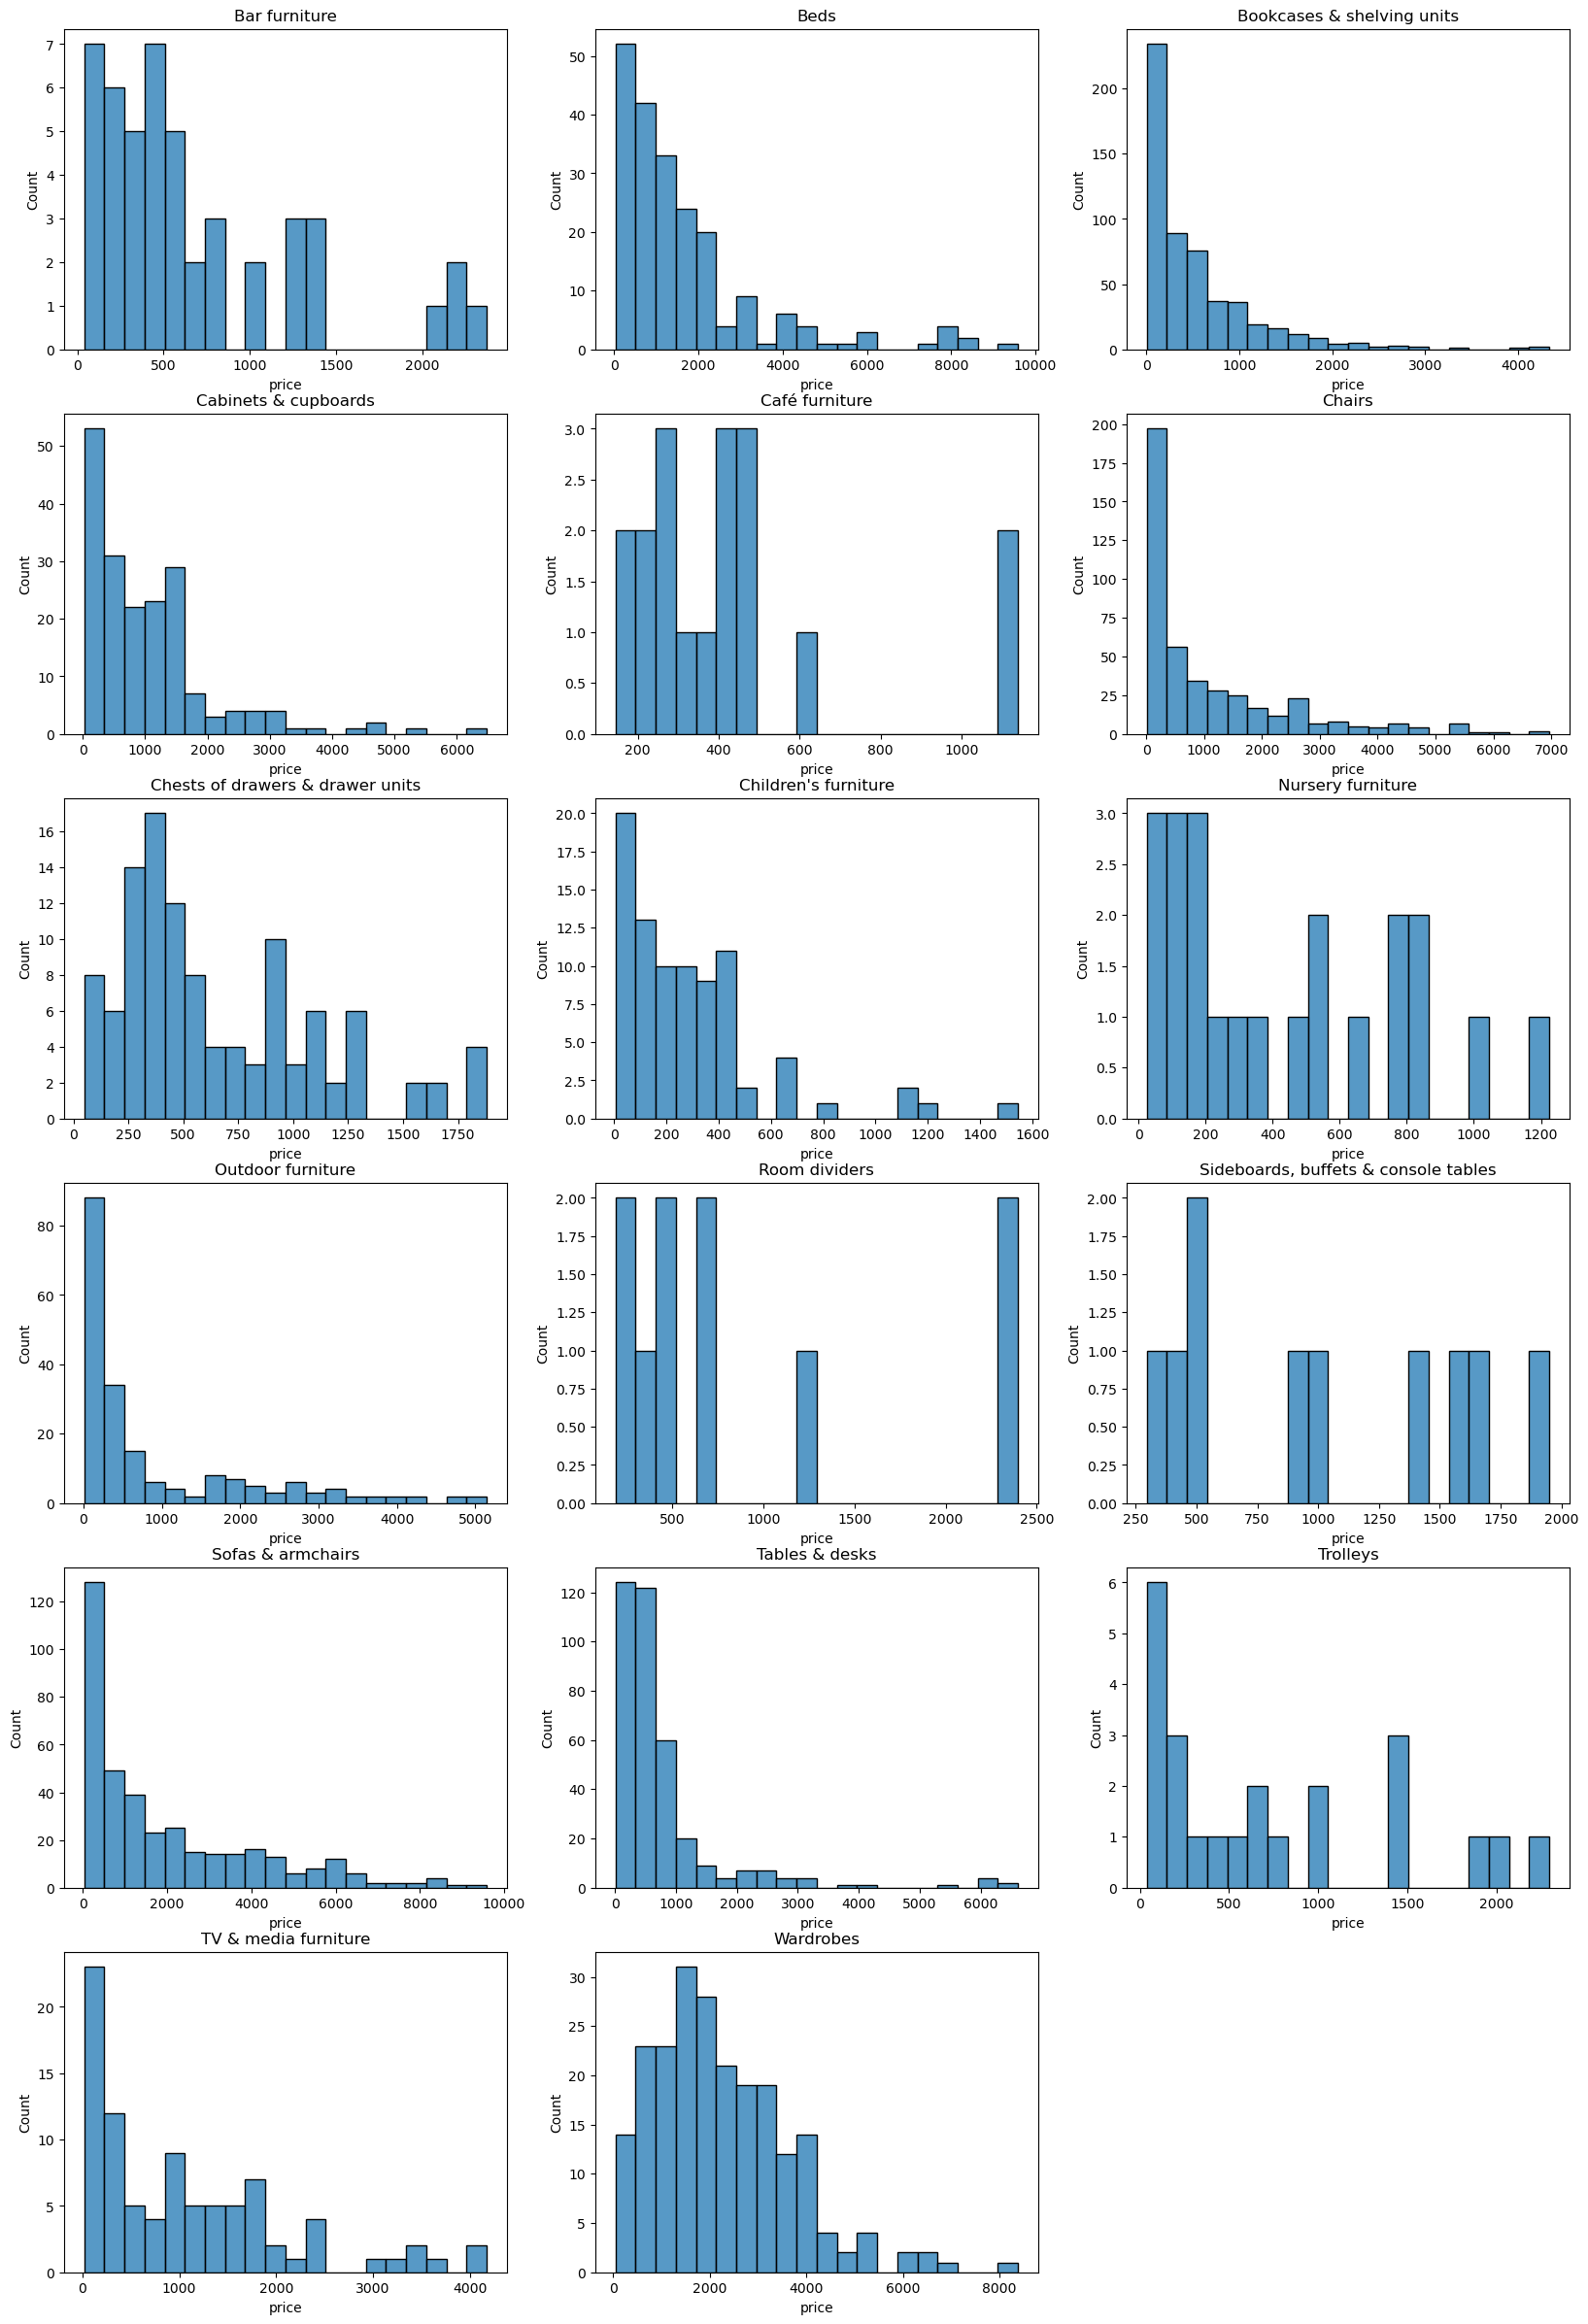

In [14]:
plt.figure(figsize=(20,30))
for i, category in enumerate(df.category.unique()):
    plt.subplot(math.ceil(len(df.category.unique())/3), 3, i+1)
    x = df[df.category == category]
    sns.histplot(x.price,bins=20)
    plt.title(category)
    
plt.show()

- Price distribution in the categories Bookcases & shelving units, Chairs, Sofas & armchairs, Tables & desks (the main categories according to the analyzed data) looks about the same
- And they can determine the type of price distribution for goods in general, because these categories have the largest amount of data.

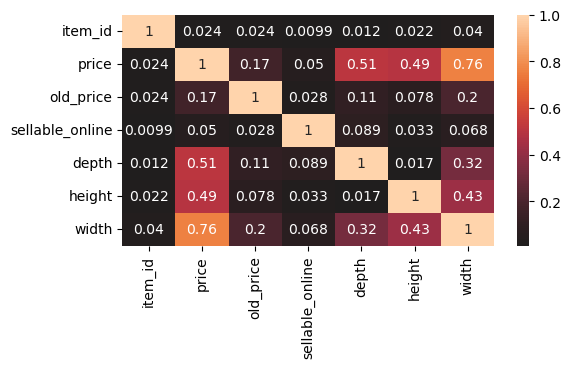

In [15]:
plt.figure(figsize=(6,3))
sns.heatmap(df.corr(method='spearman'),
           xticklabels=df.corr().columns,
           yticklabels=df.corr().columns,
           center=0,
           annot=True)
plt.show()

- A strong correlation is observed between the price and the 'width', 'height', 'depth', 'old_price' parameters. 
- 'sellable_online' and 'item_id' have no effect on the price

In [16]:
df.isnull().sum()

item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1118
height                726
width                 442
dtype: int64

In [17]:
from statistics import mean
def fill_size(param_to_fill,descr,param1,param2,dev=0):
    if not np.isnan(param_to_fill):
        return param_to_fill
    if not isinstance(descr, str) or ' cm' not in descr:
        return param_to_fill
    description = descr.split(',')
    description = description[-1].split('cm')
    description = description[0]
    size_param = []
    for par in [param_to_fill,param1,param2]:
        if not np.isnan(par):
            size_param.append(par)
    if 'x' in description:
        description = description.replace('/','x').strip().replace(' ','x')
        size_descr = description.split('x')
        for i in range(len(size_descr)):
            if '-' in size_descr[i]:
                temp = size_descr[i].split('-')
                temp = [float(x) for x in temp]
                size_descr[i] = mean(temp)
        size_descr = [float(x) for x in size_descr]
        for element in size_descr:
            if element in size_param or element+dev in size_param or element-dev in size_param:
                if element in size_param:
                    size_param.remove(element)
                if element+dev in size_param:
                    size_param.remove(element+dev)
                if element-dev in size_param:
                    size_param.remove(element-dev)
            else:
                return element
                break
    elif description.strip().isdigit() and len(size_param)==2:
        return float(description.strip())
    else:
        return param_to_fill

In [18]:
df['depthf'] = df.apply(lambda x: fill_size(x['depth'],x['short_description'],x['height'],x['width'],dev=1), axis = 1)
df['heightf'] = df.apply(lambda x: fill_size(x['height'],x['short_description'],x['depthf'],x['width'],dev=1), axis = 1)
df['widthf'] = df.apply(lambda x: fill_size(x['width'],x['short_description'],x['depthf'],x['heightf'],dev=1), axis = 1)

In [19]:
# Inputting missing data in different ways
df[['depthf0', 'heightf0', 'widthf0']] = df[['depthf', 'heightf', 'widthf']].fillna(0)
median_df = df.groupby(['category'])['depthf'].median()
median_hf = df.groupby(['category'])['heightf'].median()
median_wf = df.groupby(['category'])['widthf'].median()
mean_df = df.groupby(['category'])['depthf'].mean()
mean_hf = df.groupby(['category'])['heightf'].mean()
mean_wf = df.groupby(['category'])['widthf'].mean()
mode_df = df.groupby(['category'])['depthf'].agg(lambda x: x.mode() if type(x.mode)==np.float64 
                                                 else sum(x.mode())/len(x.mode()))
mode_hf = df.groupby(['category'])['heightf'].agg(lambda x: x.mode() if type(x.mode)==np.float64 
                                                  else sum(x.mode())/len(x.mode()))
mode_wf = df.groupby(['category'])['widthf'].agg(lambda x: x.mode() if type(x.mode)==np.float64 
                                                 else sum(x.mode())/len(x.mode()))

df = df.set_index(['category'])
df['depth_medianf'] = df['depthf'].fillna(median_df)
df['height_medianf'] = df['heightf'].fillna(median_hf)
df['width_medianf'] = df['widthf'].fillna(median_wf)

df['depth_meanf'] = df['depthf'].fillna(mean_df)
df['height_meanf'] = df['heightf'].fillna(mean_hf)
df['width_meanf'] = df['widthf'].fillna(mean_wf)

df['depth_modef'] = df['depthf'].fillna(mode_df)
df['height_modef'] = df['heightf'].fillna(mode_hf)
df['width_modef'] = df['widthf'].fillna(mode_wf)
df = df.reset_index()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2962 entries, 0 to 2961
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           2962 non-null   object 
 1   item_id            2962 non-null   int64  
 2   name               2962 non-null   object 
 3   price              2962 non-null   float64
 4   old_price          2962 non-null   int32  
 5   sellable_online    2962 non-null   bool   
 6   link               2962 non-null   object 
 7   other_colors       2962 non-null   object 
 8   short_description  2962 non-null   object 
 9   designer           2962 non-null   object 
 10  depth              1844 non-null   float64
 11  height             2236 non-null   float64
 12  width              2520 non-null   float64
 13  depthf             2436 non-null   float64
 14  heightf            2371 non-null   float64
 15  widthf             2554 non-null   float64
 16  depthf0            2962 

In [27]:
# Choosing the way to input missing values
from sklearn.feature_selection import mutual_info_classif,mutual_info_regression
from sklearn.feature_selection import SelectKBest
type_data_size = [['heightf0','height_medianf','height_meanf','height_modef'],
                  ['widthf0','width_medianf','width_meanf','width_modef'],
                  ['depthf0','depth_medianf','depth_meanf','depth_modef']]
select_type_size=[]
for x in type_data_size:
    df_x = df[x]
    df_y = df['price']

    mir_features = SelectKBest(mutual_info_regression, k=1)
    x_best_features = mir_features.fit(df_x, df_y)
    print(x_best_features.get_support(indices=True))
    select_type_size.append(list(x_best_features.get_support(indices=True)))
    
select_type_size=[x for y in select_type_size for x in y]

def freq(source):
    d = {}
    for x in source:
        d[x] = d[x] + 1 if x in d else 1
    freq_v = max(d, key=d.get)
    return freq_v

if len(set(select_type_size)) == len(type_data_size):
    print('The results are mixed, more research is needed.')
else:
    ind = freq(select_type_size)
    select_type_size = []    
    for x in type_data_size:
        df_x = df[x]
        select_type_size.append(df_x.columns[ind])
    
    print(select_type_size)

[2]
[2]
[2]
['height_meanf', 'width_meanf', 'depth_meanf']


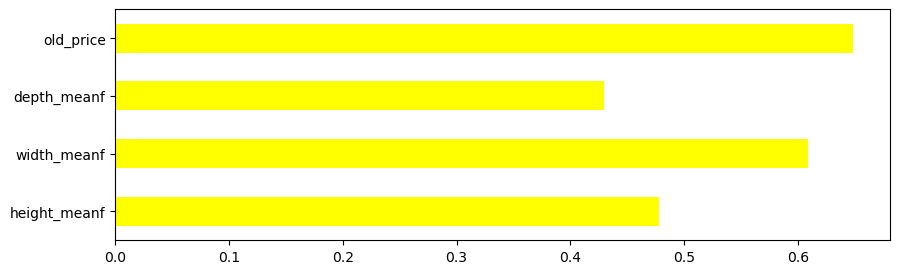

In [28]:
_, ax1 = plt.subplots(1,1,figsize=(10,3))
select_type_size.append('old_price')
df_x6 = df[select_type_size]
df_y6 = df['price']

importance_6 = mutual_info_regression(df_x6,df_y6)
feature_importances = pd.Series(importance_6, df_x6.columns)
feature_importances.plot(kind='barh', color='yellow', ax=ax1)

plt.show()

In [29]:
# The mean value is chosen to input the missing values.
# The remaining columns with calculations can be deleted
data_for_del = [y for x in type_data_size for y in x if y not in select_type_size]
df = df.drop(data_for_del, axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2962 entries, 0 to 2961
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           2962 non-null   object 
 1   item_id            2962 non-null   int64  
 2   name               2962 non-null   object 
 3   price              2962 non-null   float64
 4   old_price          2962 non-null   int32  
 5   sellable_online    2962 non-null   bool   
 6   link               2962 non-null   object 
 7   other_colors       2962 non-null   object 
 8   short_description  2962 non-null   object 
 9   designer           2962 non-null   object 
 10  depth              1844 non-null   float64
 11  height             2236 non-null   float64
 12  width              2520 non-null   float64
 13  depthf             2436 non-null   float64
 14  heightf            2371 non-null   float64
 15  widthf             2554 non-null   float64
 16  depth_meanf        2962 

In [30]:
# Clean data of designers
import contextlib
def cleanDesigners(value, removeIKEA=False, emptyValue=np.nan):
    if not isinstance(value, str):
        return Value
    if len(value)>0 and value[0].isdigit():
        return emptyValue
    designers = set(value.split('/'))
    if removeIKEA:
        with contextlib.suppress(Exception):
            designers.remove('IKEA of Sweden')
    return '/'.join(sorted(designers)) if len(designers) > 0  else emptyValue

In [31]:
df['designer_clean'] = df['designer'].apply(cleanDesigners, args=(True, 'Without a designer'))

Hypothesis 1:
- H0: Price and width have positive covariance
- H1: Price and width have negative covariance
- H2: Price and width are independent

In [32]:
H0_test = np.cov(df['price'],df['width_meanf'])
if H0_test[0][1] > 0:
    print('H0 is approved: price and width have positive covariance')
elif H0_test[0][1] == 0:
    print('H0 is rejected: price and width are independent')
elif H0_test[0][1] < 0:
    print('H0 is approved: price and width have negative covariance')

H0 is approved: price and width have positive covariance


Hypothesis 2:
- H0: The distribution of prices into 4 main categories (Bookcases & shelving units, Chairs, Sofas & armchairs, Tables & desks) describes the distribution of prices in general
- H1: the distribution of prices in the four main categories does not determine the distribution of prices in general

In [33]:
samp0 = df['price'].apply(np.log10)
samp = df[(df['category'] == 'Bookcases & shelving units')|(df['category'] == 'Chairs')|(df['category'] == 'Sofas & armchairs')|(df['category'] == 'Tables & desks')]['price'].apply(np.log10)
H0_test1 = stats.mannwhitneyu(samp0, samp).pvalue
H0_test2 = stats.mannwhitneyu(samp0, samp).pvalue
if H0_test1 > 0.75 and H0_test2 > 0.75:
    print('H0 is approved, H1 is rejected')
else:
    print('H1 is approved, H0 is rejected')

H1 is approved, H0 is rejected


Hypothesis 3:
- H0: category and name are independent of each other
- H1: category and name are dependent variables

In [34]:
H0 = 'Category and name are independent of each other.'
H1 = 'Category and name are dependent variables.'
crosstab = pd.crosstab(df.category, df.name, margins = True)
observed = crosstab.iloc[0:-1,0:-1]
chi = stats.chi2_contingency(observed=observed)
p_value = chi[1]
print('p_value: {0}'.format(p_value))
if p_value < 0.05:
    print('H1 is approved, H0 is rejected.', H1)
else:
    print('H0 is approved, H1 is rejected')

p_value: 0.0
H1 is approved, H0 is rejected. Category and name are dependent variables.


PREDICTION MODEL

In [35]:
# Prepering data
df['other_colors_1'] = df['other_colors'].map(dict(Yes=1, No=0))

median_ctg = df.groupby(['category'])['price'].median()
median_dsgn = df.groupby(['designer_clean'])['price'].median()

df = df.set_index(['category'])
df['category_median_price'] = median_ctg
df = df.reset_index()

df = df.set_index(['designer_clean'])
df['designer_median_price'] = median_dsgn
df = df.reset_index()

In [36]:
# Clearing outliers in data price
clean_price = pd.DataFrame()
for category in df['category'].unique():
    df_cat = df[df['category']==category]
    Q1 = np.percentile(df_cat['price'],25)
    Q3 = np.percentile(df_cat['price'],75)
    IQR = Q3 - Q1
    df_cat=df_cat[(df_cat['price']>(Q1 - 1.5 * IQR))&(df_cat['price']<(Q3 + 1.5 * IQR))][['item_id']]
    clean_price = pd.concat([clean_price,df_cat], axis='index')
    clean_price['indice'] = 1

In [37]:
df_clean_price = df.merge(clean_price, on ='item_id',how='left')
df_clean_price.dropna(subset=['indice'],inplace=True)
df_clean_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2795 entries, 0 to 2961
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   designer_clean         2795 non-null   object 
 1   category               2795 non-null   object 
 2   item_id                2795 non-null   int64  
 3   name                   2795 non-null   object 
 4   price                  2795 non-null   float64
 5   old_price              2795 non-null   int32  
 6   sellable_online        2795 non-null   bool   
 7   link                   2795 non-null   object 
 8   other_colors           2795 non-null   object 
 9   short_description      2795 non-null   object 
 10  designer               2795 non-null   object 
 11  depth                  1754 non-null   float64
 12  height                 2117 non-null   float64
 13  width                  2376 non-null   float64
 14  depthf                 2292 non-null   float64
 15  heig

Columns for delete:
- item_id and link - unique values that do not affect the model
- sellable_online - parameter is not important because 99% of it is the value of True
- short_description - was used for imputing empty values of sizes, but for predicting model it is not representative
- designer has been replaced by clean data designer
- variable 'name' depends on 'category', so we can use only variable 'category'


In [38]:
df = df.drop(['item_id','link','sellable_online','short_description','designer'], axis=1)
df_clean_price = df_clean_price.drop(['item_id','link','sellable_online','short_description','designer','indice'], axis=1)

In [39]:
df['other_colors_1'] = df['other_colors'].map(dict(Yes=1, No=0))

median_ctg = df.groupby(['category'])['price'].median()
median_dsgn = df.groupby(['designer_clean'])['price'].median()

df = df.set_index(['category'])
df['category_median_price'] = median_ctg
df = df.reset_index()

df = df.set_index(['designer_clean'])
df['designer_median_price'] = median_dsgn
df = df.reset_index()

In [40]:
def getBestRegressor(X, Y):
    X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)
    models = [
        sk.linear_model.LinearRegression(),
        sk.linear_model.LassoCV(),
        sk.linear_model.RidgeCV(),
        sk.svm.SVR(kernel='linear'),
        sk.neighbors.KNeighborsRegressor(n_neighbors=16),
        sk.tree.DecisionTreeRegressor(max_depth=10, random_state=42),
        RandomForestRegressor(random_state=42),
        GradientBoostingRegressor(),
        sk.ensemble.HistGradientBoostingRegressor()
    ]
 
    TestModels = pd.DataFrame()
    tmp = {}
    for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(X_train, Y_train)
        tmp['R^2'] = '{:.5f}'.format(model.score(X_test, Y_test), ndigits=3)
        tmp['MAE'] = '{:.5f}'.format(sk.metrics.mean_absolute_error(model.predict(X_test), Y_test), ndigits=2)
        tmp['RMSE'] = '{:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(model.predict(X_test), Y_test)), ndigits=2)
 
        TestModels = pd.concat([TestModels, pd.DataFrame([tmp])])
    TestModels.set_index('Model', inplace=True)
    return {'model': TestModels, 'X_train': X_train, 'Y_train': Y_train, 'X_test': X_test, 'Y_test': Y_test}

In [41]:
# testing models on data with outliers
X1 = df[['width_meanf','depth_meanf','height_meanf','category_median_price','designer_median_price','other_colors_1','old_price']]
Y1 = df['price']

test1 = getBestRegressor(X1,Y1)
test1['model'].sort_values(by='R^2', ascending=False)

,R^2,MAE,RMSE
Model,,,
RandomForestRegressor,0.86559,297.97481,503.15522
HistGradientBoostingRegressor,0.84854,322.34570,534.11191
GradientBoostingRegressor,0.84319,365.49416,543.45959
DecisionTreeRegressor,0.79880,379.91245,615.59126
KNeighborsRegressor,0.78790,392.43803,632.05083
LassoCV,0.66875,552.80066,789.88467
LinearRegression,0.66735,558.40332,791.54855
RidgeCV,0.66733,558.40599,791.56606
SVR,0.66654,502.51882,792.50600


In [42]:
# testing models on data without outliers
X2 = df_clean_price[['width_meanf','depth_meanf','height_meanf','category_median_price','designer_median_price','other_colors_1','old_price']]
Y2 = df_clean_price['price']

test2 = getBestRegressor(X2,Y2)
test2['model'].sort_values(by='R^2', ascending=False)

,R^2,MAE,RMSE
Model,,,
RandomForestRegressor,0.84533,242.08013,414.05811
HistGradientBoostingRegressor,0.82700,256.96888,437.90636
GradientBoostingRegressor,0.80588,294.60377,463.86775
DecisionTreeRegressor,0.79373,304.45448,478.16265
KNeighborsRegressor,0.74761,322.60938,528.91661
LassoCV,0.62411,446.24567,645.48517
RidgeCV,0.62387,450.77086,645.69030
LinearRegression,0.62383,450.84144,645.72016
SVR,0.59123,432.92879,673.11921


The model on data without outliers has a lower R^2, but also has lower values of mean absolute error and root mean square error.
RandomForestRegressor model without outliers is selected

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Estimator: RandomForestRegressor(max_depth=200, max_features='sqrt', n_estimators=350)
Best Score    : 0.8553220236909063

R^2           : 0.84981
MAE           : 238.29214
RMSE          : 408.02035

Feature importance:
-------------------------
0.35826    width_meanf
0.11348    depth_meanf
0.12217    height_meanf
0.11060    category_median_price
0.19050    designer_median_price
0.01317    other_colors_1
0.09182    old_price


<AxesSubplot:>

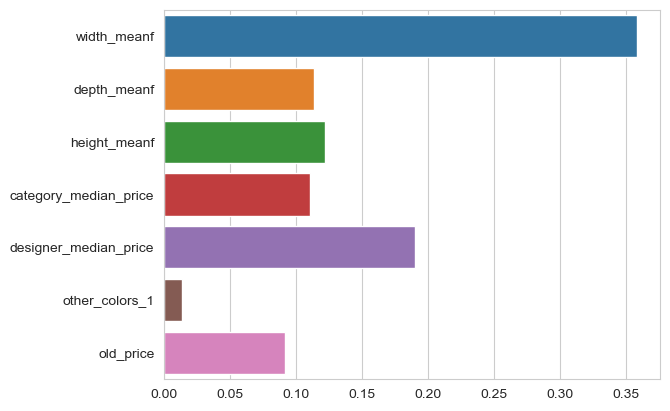

In [43]:
from sklearn.model_selection import RandomizedSearchCV
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X2, Y2, test_size=0.2, random_state=42)
forest_grid = RandomizedSearchCV(RandomForestRegressor(), {'n_estimators': range(50,500,50),
                                                    'max_depth': [10,100,200,None],
                                                    'max_features':['auto','sqrt','log2']}, 
                                                     n_iter=120, cv=5, n_jobs=-1, verbose=3) 
forest_grid.fit(X_train,Y_train)

print("Best Estimator:",forest_grid.best_estimator_)
print("Best Score    :",forest_grid.best_score_)
print('')
print('R^2           : {:.5f}'.format(sk.metrics.r2_score(Y_test, forest_grid.predict(X_test))))
print('MAE           : {:.5f}'.format(sk.metrics.mean_absolute_error(forest_grid.predict(X_test), Y_test)))
print('RMSE          : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(forest_grid.predict(X_test), Y_test))))
print('')
print('Feature importance:')
print('-------------------------')
for feat, importance in zip(X_train.columns, forest_grid.best_estimator_.feature_importances_):
    print('{:.5f}    {f}'.format(importance, f=feat))
    
sns.set_style('whitegrid')
sns.barplot(y=X_train.columns, x=forest_grid.best_estimator_.feature_importances_)

The most important feature is 'width', whereas 'old_price' has the least effect on model.